# Workflow:
- Initialize all variables
- Load boundary conditions
- Load constants

Iteratively:
- Step forward in time (update prognostic variables)
- Update diagnostic variables
- Save variables for plotting

In [1]:
import numpy as np
from time_step import dState
import matplotlib.pyplot as plt

State_0 = np.array([2., 2., 10., 34., 34., 35., 20.]) #[T_u, T_l, T_e, S_u, S_l, S_e, h_ice]

current_state = State_0
dt = 1 #day

T_u=[]
T_l=[]
T_e=[]
S_u=[]
S_l=[]
S_e=[]

h=[]
for day in range(1, 20*365+1):
    current_state[:-1] += dState(current_state, day)[:-1] * dt #simplest possible Euler integration
    current_state[-1] = dState(current_state, day)[-1]
    h.append(current_state[-1])
    
    T_u.append(current_state[0])
    T_l.append(current_state[1])
    T_e.append(current_state[2])

    S_u.append(current_state[3])
    S_l.append(current_state[4])
    S_e.append(current_state[5])


-5.999999999999998e-10 -5.999999999999998e-10
-5.998940462957299e-10 -5.999342469353427e-10
-5.998940462957299e-10 -5.999342469353427e-10
-5.998412686301823e-10 -5.999214636715277e-10
-5.998412686301823e-10 -5.999214636715277e-10
-5.998415053924553e-10 -5.999614896552624e-10
-5.998415053924553e-10 -5.999614896552624e-10
-5.998945796990498e-10 -6.000541490552235e-10
-5.998945796990498e-10 -6.000541490552235e-10
-6.000002994449828e-10 -6.001992508132122e-10
-6.000002994449828e-10 -6.001992508132122e-10
-6.001584573594791e-10 -6.00396588699863e-10
-6.001584573594791e-10 -6.00396588699863e-10
-6.003688310661201e-10 -6.006459413748365e-10
-6.003688310661201e-10 -6.006459413748365e-10
-6.0063118314748e-10 -6.009470724514785e-10
-6.0063118314748e-10 -6.009470724514785e-10
-6.009452612142394e-10 -6.012997305659545e-10
-6.009452612142394e-10 -6.012997305659545e-10
-6.0131079797874e-10 -6.017036494508441e-10
-6.0131079797874e-10 -6.017036494508441e-10
-6.017275113329531e-10 -6.021585480131078e-1

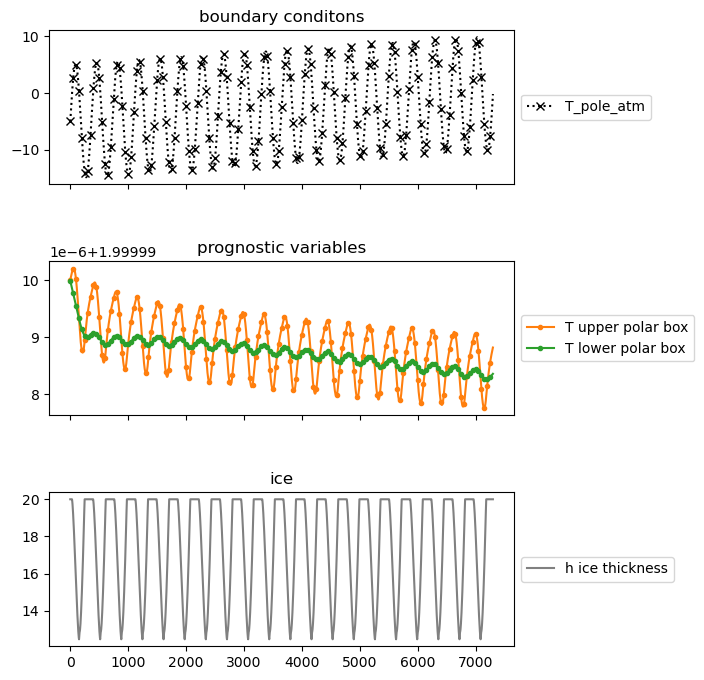

In [8]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(6,8), sharey=False, sharex=True, gridspec_kw={'hspace':0.5})

axs[0].set_title('boundary conditons')
day, T_atm_pole, T_atm_eq = np.genfromtxt('simulation.ice_age.csv', delimiter=',', skip_header=1, unpack=True)
# axs[0].plot(day, T_atm_eq, color='k', ls=':', marker='o', label='T_eq_atm', markevery=50)
axs[0].plot(day, T_atm_pole, color='k', ls=':', marker='x', label='T_pole_atm', markevery=50)

axs[1].set_title('prognostic variables')
axs[1].plot(T_u, color='C1', label='T upper polar box', marker='.', markevery=50)
axs[1].plot(T_l, color='C2', label='T lower polar box', marker='.', markevery=50)
# axs[1].plot(T_e, color='C0', label='T equator box', marker='.', markevery=50)

axs[2].set_title('ice')
axs[2].plot(h, color='grey', label='h ice thickness')

for ax in axs:
    # ax.set_xlim(xmin=0,xmax=4*365)
    # ax.set_ylim(ymin=12,xmax=15)
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5))

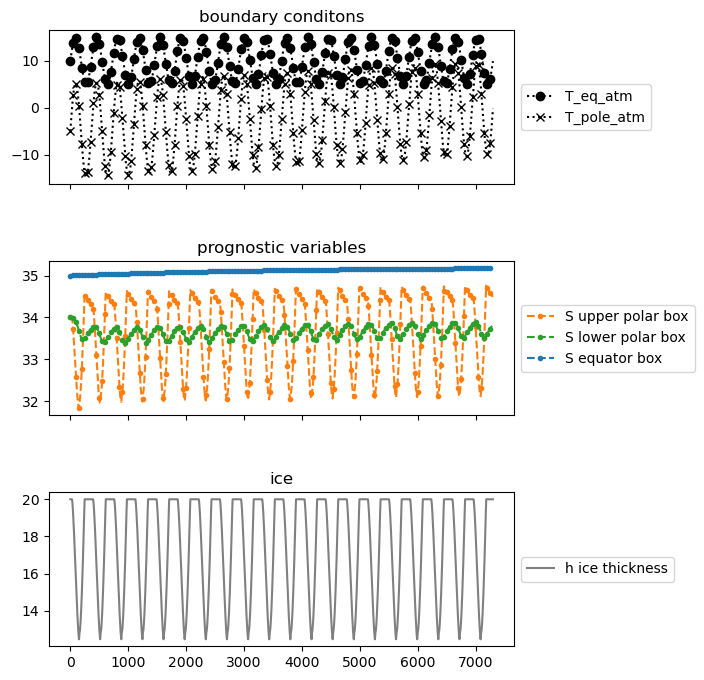

In [5]:
fig, axs = plt.subplots(ncols=1, nrows=3, figsize=(6,8), sharey=False, sharex=True, gridspec_kw={'hspace':0.5})

axs[0].set_title('boundary conditons')
day, T_atm_pole, T_atm_eq = np.genfromtxt('simulation.ice_age.csv', delimiter=',', skip_header=1, unpack=True)
axs[0].plot(day, T_atm_eq, color='k', ls=':', marker='o', label='T_eq_atm', markevery=50)
axs[0].plot(day, T_atm_pole, color='k', ls=':', marker='x', label='T_pole_atm', markevery=50)

axs[1].set_title('prognostic variables')
axs[1].plot(S_u, color='C1', label='S upper polar box', marker='.', ls='--', markevery=50)
axs[1].plot(S_l, color='C2', label='S lower polar box', marker='.', ls='--', markevery=50)
axs[1].plot(S_e, color='C0', label='S equator box', marker='.', ls='--', markevery=50)

axs[2].set_title('ice')
axs[2].plot(h, color='grey', label='h ice thickness')

for ax in axs:
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
    # ax.set_xlim(xmin=0, xmax=365*4)